Dataset: https://www.kaggle.com/mathurinache/world-happiness-report

Hello friends! Today we'll be using the above dataset, which contains CSV files for Gallup's World Happiness Report from 2015-2020. We'll visualize global happiness by region, country, and year and check for correlations between GDP per capita and happiness. We'll also build functions to plot a country's happiness over each year and show us the change in happiness of a country across given years.  
  
Unfortunately, each CSV was formatted significantly differently. This means we have to take a good amount of code to clean the data for our uses. More specifically, we pull out a few common values (GDP per capita, life expectancy, and freedom)and fix the format of the titles to all match. Since we concatenated each dataframe into one large one, we added a year column to our dataframe so we can sort by year later if we so choose.  
  
It was a really fun project, and if you want to ask questions or give me critique, the place to do it is in my Discord server at https://discord.gg/2hcWnTF! And as always, if you want to see me write code in real time, I'm live on Twitch every Monday, Wednesday, and Friday at https://twitch.tv/MitchsWorkshop!  
  
Thanks for reading. Enjoy!

In [5]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
sns.set()
%matplotlib inline

Here, we define two functions:  
- happiness_change takes in a dataframe, a name of a country, and a tuple of years. It returns a float value of the change in happiness across the given years.    

-  happy_over_time takes in a dataframe, country, and a tuple that will set a y-limit. It's set to (1,10) by default because that's the most honest way to view a single country against the global scale. But you can change it to view the graph in more detail. The function displays a plot of a given country's happiness across every year in the dataset.

In [163]:
# return the difference in happiness across given years for a given country
def happiness_change(df, country, years=(2015,2020)):
    country = country.title()

    # our boolean indecies for searching our dataframe
    is_year1 = df["year"] == years[0]
    is_year2 = df["year"] == years[1]
    is_country = df["country"] == country

    # finding the float values of the happiness score at the start and end year
    hap1 = float(df.loc[is_year1 & is_country, "happiness_score"])
    hap2 = float(df.loc[is_year2 & is_country, "happiness_score"])

    return hap2-hap1

# plotting the happiness of a given country across every year in the dataset
def happy_over_time(df, country, lim=(1,10)):
    data = {} # this dict will be where we aggregate our data
    country = country.title()

    # finding the happiness score of a country for every year 
    for year in df["year"].unique():

        # more boolean indexing
        is_year = df["year"] == year 
        is_country = df["country"] == country

        score = float(df.loc[is_year & is_country, "happiness_score"])
        data[year] = score

    # pulling the data from the dict to populate an x and y axis
    x_data = list(data.keys())
    y_data = [data[key] for key in x_data]

    # display the plot
    fig = plt.figure(figsize=(10,10))
    plt.plot(x_data, y_data)
    plt.title(f"{country} Happiness from 2015-2020")
    plt.xlabel("Year")
    plt.ylabel("Happiness Score")
    plt.ylim(lim)
    plt.show()

So this is the most nightmarish part. This is what data cleaning looks like if you're me. The reason that it's so ugly is thus: every couple years, the formatting of the data changed. Columns were added and removed, naming conventions changed, and the order of the columns was moved around. In fact, there wasn't even a rank column in 2020, so we make one ourselves.  
In general, we:  
- read the CSV into a dataframe  
- pull the columns that we want from that dataframe  
- rename those columns to make concatenation more graceful  
- add a year column  
  
Of course, we also had to make a rank column for the 2020 dataset. To do so, we sorted by happiness score and used the index that pandas provided to number our ranks (adding 1 to account for pandas indecies being 0-based).

In [164]:
# 2015
raw_2015 = pd.read_csv("2015.csv")
df_2015 = raw_2015[["Country", "Happiness Rank", "Happiness Score", "Economy (GDP per Capita)", "Health (Life Expectancy)", "Freedom"]]
df_2015.columns = ["country", "happiness_rank", "happiness_score", "gdp_per_capita", "life_expectancy", "freedom"]
df_2015["year"] = 2015

# 2016
raw_2016 = pd.read_csv("2016.csv")
df_2016 = raw_2016[["Country", "Happiness Rank", "Happiness Score", "Economy (GDP per Capita)", "Health (Life Expectancy)", "Freedom"]]
df_2016.columns = ["country", "happiness_rank", "happiness_score", "gdp_per_capita", "life_expectancy", "freedom"]
df_2016["year"] = 2016

# 2017 added periods to column headers, so we used our own names to make it uniform
raw_2017 = pd.read_csv("2017.csv")
df_2017 = raw_2017[["Country", "Happiness.Rank", "Happiness.Score", "Economy..GDP.per.Capita.", "Health..Life.Expectancy.", "Freedom"]]
df_2017.columns = ["country", "happiness_rank", "happiness_score", "gdp_per_capita", "life_expectancy", "freedom"]
df_2017["year"] = 2017

# 2018 made changes again, removing the periods from before, and changing the order of the columns
raw_2018 = pd.read_csv("2018.csv")
df_2018 = raw_2018[["Overall rank", "Country or region", "Score", "GDP per capita", "Healthy life expectancy", "Freedom to make life choices"]]
df_2018.columns = ["happiness_rank", "country", "happiness_score", "gdp_per_capita", "life_expectancy", "freedom"]
df_2018["year"] = 2018

# 2019 was identical to 2018
raw_2019 = pd.read_csv("2019.csv")
df_2019 = raw_2019[["Overall rank", "Country or region", "Score", "GDP per capita", "Healthy life expectancy", "Freedom to make life choices"]]
df_2019.columns = ["happiness_rank", "country", "happiness_score", "gdp_per_capita", "life_expectancy", "freedom"]
df_2019["year"] = 2019

# 2020 was different again, renaming columns and removing the rank column. We made our own.
raw_2020 = pd.read_csv("2020.csv")
df_2020 = raw_2020[["Country name", "Ladder score", "Logged GDP per capita", "Healthy life expectancy", "Freedom to make life choices"]]
df_2020.columns = ["country", "happiness_score", "gdp_per_capita", "life_expectancy", "freedom"]
df_2020["year"] = 2020
# Here, we sort by happiness score to create a rank column based on index. (+1 for 1-based numbering)
df_2020["happiness_rank"] = df_2020.sort_values(by="happiness_score", ascending=False).index + 1

# finally, we concatenate our dataframes into one, using ignore_index to assign new indecies unique to the new dataframe
df = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019, df_2020], ignore_index=True)

Here is a simple scatterplot looking for the correlation between the weight of GDP per capita against happiness. We've removed the year 2020 because the data was collected differently, causing the plot to be unhelpful. The values for GDP per capita are not the actual GDP values in that country, but the weight that GDP per capita has on happiness in a given country. Clearly there is a loose positive correlation between GDP weight and happiness. A similar shape occurred for 2020, but didn't work in the context of the same plot.

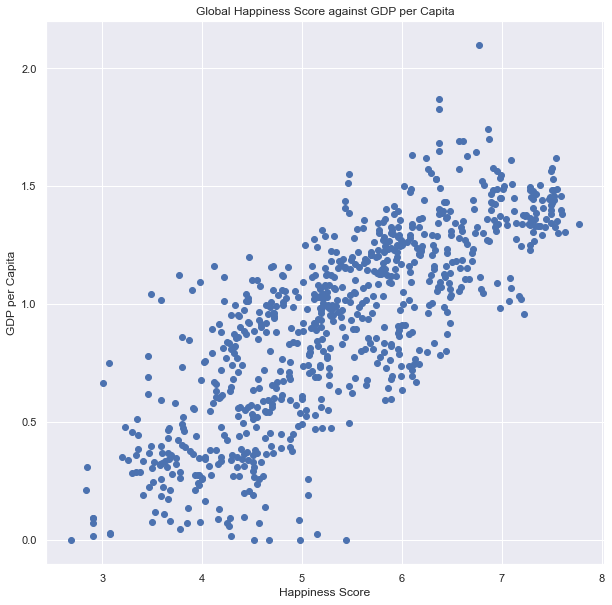

In [165]:
# boolean index again
not_2020 = df["year"] != 2020 

# showing the plot
fig = plt.figure(figsize=(10,10))
plt.scatter(df.loc[not_2020, "happiness_score"], df.loc[not_2020, "gdp_per_capita"])
plt.title("Global Happiness Score against GDP per Capita")
plt.xlabel("Happiness Score")
plt.ylabel("GDP per Capita")
plt.show()

Here, we use our happiness_change function to populate a dictionary of the changes (positive or negative) in happiness across the five years in our dataset for every country in an arbitrary list. We then convert our dictionary to a pandas Series object for ease of display. Keep in mind that this technique could be used to check the same data for every country in the dataset, should you choose. 

In [171]:
countries = ["United States", "Brazil", "Turkey", "Japan", "China", "Hungary"]
data = {}

for country in countries:
    data[country] = happiness_change(df, country)

data_series = pd.Series(data)
data_series

United States   -0.1794
Brazil          -0.6074
Turkey          -0.2002
Japan           -0.1162
China           -0.0161
Hungary          1.2004
dtype: float64

In the next cell, we make use of our happy_over_time function to show the change in happiness for India over every year in the dataset. Obviously, this could be done for any country in the dataset. I encourage you to explore your own! Also, keep in mind that I've changed the y-limit for ease of visualization, but the sharp downward curve is only between ~4.6 to ~3.6.|

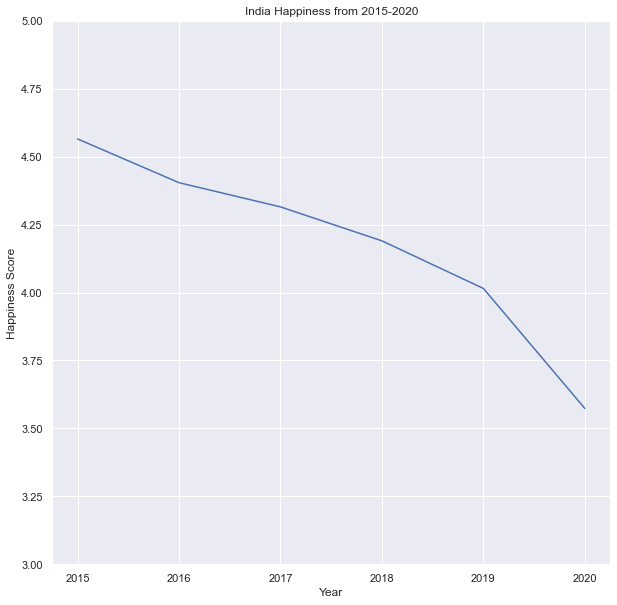

In [175]:
happy_over_time(df, "India", (3,5))

Since regional labels weren't provided in the data for any years but 2015, 2016, and 2020, I've chosen one (2015) and plotted mean happiness across each region on a bar plot. As always, for ease of vision, I'm changed the y-limit, but the changes aren't as drastic as they look at a glance. Always check your y-limits when you look at charts.

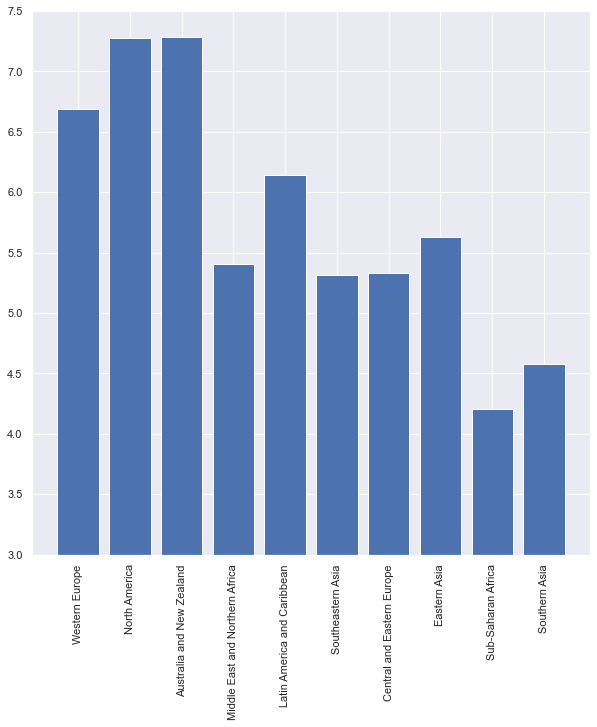

In [176]:
regions = raw_2015["Region"].unique() # returns an array of every region in the dataset
region_hap = {}

# iterating through every region to find it's mean happiness
for region in regions:
    hap = raw_2015[raw_2015["Region"] == region]["Happiness Score"].mean()
    region_hap[region] = hap

# reading our region_hap dictionary to populate x and y data
x_data = list(region_hap.keys())
y_data = [region_hap[key] for key in x_data]
 
# display the plot
plt.figure(figsize=(10,10))
plt.bar(x_data, y_data)
plt.xticks(rotation=90)
plt.ylim((3,7.5))
plt.show()

Finally, we visualize the change in global happiness across every country in the dataset, giving us a global picture of human happiness in the last 5 years. Again, it's key to keep in mind that I've used the default y-limit set by matplotlib to increase the visible change in the line, but there is next to no real difference. The gap between max and min is only ~0.11 out of 10. But the world is getting happier, which is a nice insight to remember when 2020 feels daunting.

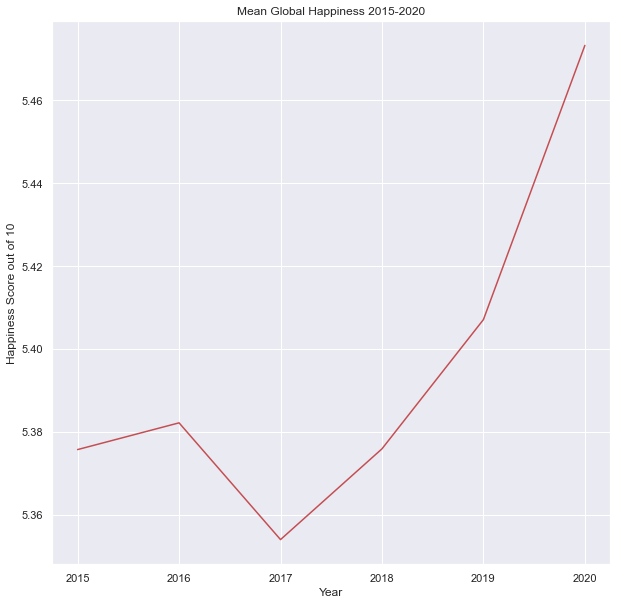

In [143]:
data = {}

for year in df["year"].unique():
    score = df.loc[df["year"]==year, "happiness_score"].mean()
    data[year] = score

x_data = list(data.keys())
y_data = [data[key] for key in x_data]

plt.figure(figsize=(10,10))
plt.plot(x_data, y_data, "r-")
plt.title("Mean Global Happiness 2015-2020")
plt.xlabel("Year")
plt.ylabel("Happiness Score out of 10")
plt.show()

Thanks for reading to the end! If you've made it this far, you may be interested in joining the conversation on Discord http://discorg.gg/2hcWnTF! And as always, I'm live three days a week streaming my progress in data science and programming in general. Thanks again for getting to the end! And remember, even if things are insane right now, the world is slowly getting happier and so will you.  
  
See you guys in Discord! :)  
- Mitch